In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/7th-subject/7th PSG.csv
/kaggle/input/7th-subject/2638030_acceleration.csv


In [2]:
def plot_graphs(history,metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric],'')
    plt.title('Training and Validation '+metric.capitalize()) #uppercase metric?
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric,'val_'+metric])
    plt.show()

968
[-0.0947723 -0.0954437 -0.0926666 ... -0.0363464 -0.0367889 -0.0364532]
(968, 1499)
(968, 1499)
(677, 1499, 3)
(677, 1499)
(291, 1499, 3)
[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]
(677, 5)
Epoch 1/38
60/60 [==============================] - 80s 1s/step - loss: 1.6418 - accuracy: 0.2784 - val_loss: 1.4327 - val_accuracy: 0.5588
Epoch 2/38
60/60 [==============================] - 73s 1s/step - loss: 1.3288 - accuracy: 0.5381 - val_loss: 1.3012 - val_accuracy: 0.5588
Epoch 3/38
60/60 [==============================] - 73s 1s/step - loss: 1.2725 - accuracy: 0.5430 - val_loss: 1.2531 - val_accuracy: 0.5588
Epoch 4/38
60/60 [==============================] - 75s 1s/step - loss: 1.2308 - accuracy: 0.5430 - val_loss: 1.2355 - val_accuracy: 0.5588
Epoch 5/38
60/60 [==============================] - 72s 1s/step - loss: 1.2071 - accuracy: 0.5580 - val_loss: 1.2368 - val_accuracy: 0.5588
Epoch 6/38
60/60 [=================

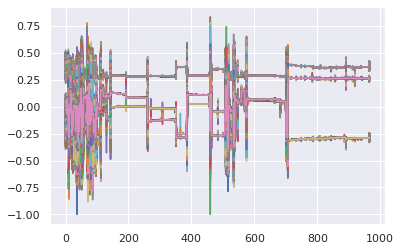

In [3]:
import math
import tensorflow as tf
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42 # for vecotr fonts in plots
matplotlib.rcParams['ps.fonttype'] = 42 # for vecotr fonts in plots
plt.close('all')
import seaborn as sns # making statistical graphics
sns.set()


def plot_CM(true_labels, predictions, activities): 
    max_true = np.argmax(true_labels, axis = 1)
    max_prediction = np.argmax(predictions, axis = 1)
    CM = confusion_matrix(max_true, max_prediction)
    plt.figure(figsize=(16,14))
    sns.heatmap(CM, xticklabels = activities, yticklabels = activities,
                annot = True, fmt = 'd',cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Load data and extract overall acceleration magnitude
PSG_file = "/kaggle/input/7th-subject/7th PSG.csv"
acc_file = "/kaggle/input/7th-subject/2638030_acceleration.csv"
fs = 50#50 
df = pd.read_csv(acc_file)
acc = df.to_numpy()
x = acc[:,1] #  first column of acc
y = acc[:,2]# second column of acc
z = acc[:,3] # third column of acc
t = acc[:,0]
ac = np.sqrt(x**2 + y**2 + z**2) - 1 # ** = exponential expression

of = pd.read_csv(PSG_file) # read PSG data
PSG = of.to_numpy()
PSG_data = PSG[:,1]
time = len(PSG_data)
#print(time)
#print(PSG[:,0])
print(time)
print(x)


scaler = MinMaxScaler(feature_range=(-1,1))
x = scaler.fit_transform(x.reshape(-1,1)).reshape(x.shape)
y = scaler.fit_transform(y.reshape(-1,1)).reshape(y.shape)
z = scaler.fit_transform(z.reshape(-1,1)).reshape(z.shape)


#x sampling
duration_in_minutes = math.floor((len(x)/fs)/30)
epoch_length = 1499#len value of epoch is 1499
X = np.empty((time,epoch_length))
X[:]=np.nan
for i in range(time): #duration_in_minutes=1091
    e_start = i * 30 * fs
    e_stop  = ((i+1) * 30 * fs) - 1
    epoch = x[e_start:e_stop]
    X[i] = epoch
plt.plot(X)
print(X.shape)
#y sampling
duration_in_minutes = math.floor((len(y)/fs)/30)
#epoch_length = 1499#len value of epoch is 1499
Y = np.empty((time,epoch_length))
Y[:]=np.nan
for i in range(time): #duration_in_minutes=1091
    e_start = i * 30 * fs
    e_stop  = ((i+1) * 30 * fs) - 1
    epoch = y[e_start:e_stop]
    Y[i] = epoch
plt.plot(Y)
print(Y.shape)
#z sampling
duration_in_minutes = math.floor((len(z)/fs)/30)
#epoch_length = 1499#len value of epoch is 1499
Z = np.empty((time,epoch_length))
Z[:]=np.nan
for i in range(time): #duration_in_minutes=1091
    e_start = i * 30 * fs
    e_stop  = ((i+1) * 30 * fs) - 1
    epoch = z[e_start:e_stop]
    Z[i] = epoch
plt.plot(Z)
for x in range(len(PSG_data)): 
    if PSG_data[x] == -1:
        PSG_data[x] = 0
    elif PSG_data[x] == 5:
        PSG_data[x] = 4
#print(PSG_data)
#division method1, produces around 64% accuracy
xtrain_acc, xtest_acc, ytrain_acc, ytest_acc, ztrain_acc, ztest_acc, psg_train, psg_test = train_test_split(
 X, Y, Z, PSG_data, test_size=0.3,random_state=20, shuffle=True)#both False 





#print(PSG_data)
train_set = [xtrain_acc, ytrain_acc, ztrain_acc]
train_set = np.array(np.dstack(train_set),dtype=np.float32)
print(train_set.shape)
#for x in train_set:
#    print(train_set)
print(xtrain_acc.shape)
test_set = [xtest_acc, ytest_acc, ztest_acc]
test_set = np.array(np.dstack(test_set),dtype = np.float32)
print(test_set.shape)
#One-hot label encoding
psg_train = tf.keras.utils.to_categorical(psg_train)
psg_test = tf.keras.utils.to_categorical(psg_test)
print(psg_train)
print(psg_train.shape)
#for x in psg_train:
 #   print(psg_train)
    #Build LSTM Model
time_steps = train_set.shape[1]##1
features = train_set.shape[2]##2
model = tf.keras.Sequential()#to stack model
model.add(tf.keras.layers.LSTM(32, input_shape = (time_steps,features),return_sequences=True))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(16, activation='relu'))#
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(5, activation ='softmax'))
#Model compiler settings
model.compile(optimizer = tf.keras.optimizers.Adam(0.002),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
#Train Model
history = model.fit(train_set, psg_train, epochs = 38, batch_size = 8,
          validation_split = 0.3, shuffle = True)
#Evaluate model
test_loss, test_acc = model.evaluate(test_set, psg_test, batch_size = 8)
model.summary()


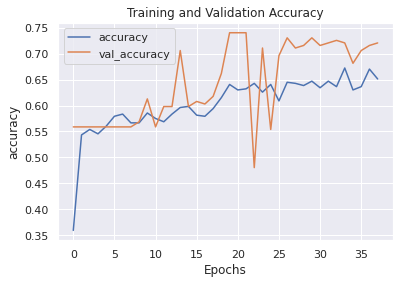

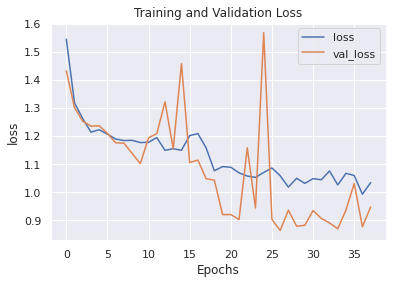

In [4]:
#Plot Accuracy and Loss Performance
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')


(291, 5)
(291, 5)


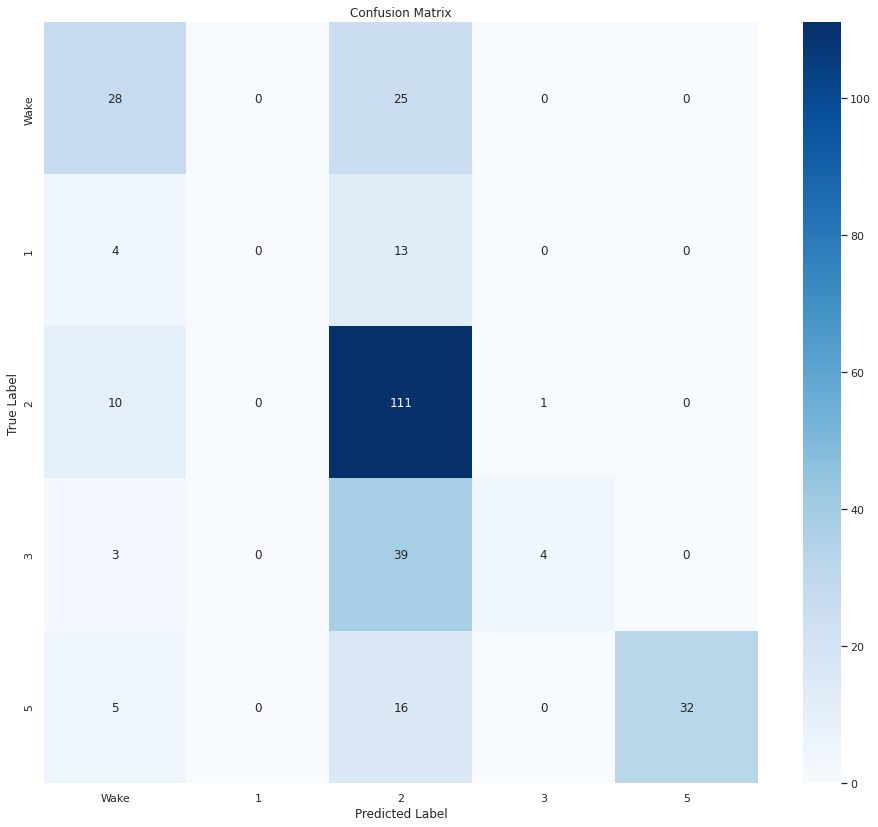


Test accuracy:  0.6013745665550232


In [5]:
#Plot Confusion Matrix of Test Predictions
predictions = model.predict(test_set)
print(predictions.shape)
print(psg_test.shape)
Activities = ['Wake', '1', '2','3', '5']
plot_CM(psg_test,predictions, Activities)
print('\nTest accuracy: ', test_acc)